# Importing libraries

In [30]:
from urllib.request import urlopen
import json
import pandas as pd
import numpy as np
import datetime as dt

# Fetching historical data

In [4]:
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2022-09-25&endtime=2022-11-01'
json_obj = urlopen(url)
data = json.load(json_obj)
df = pd.json_normalize(data, record_path=['features'])

In [211]:
df.to_csv('machine_data.csv', index=False)

In [2]:
df = pd.read_csv('machine_data.csv')

In [3]:
df

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
0,Feature,ak022dz5ezb8,2.30,"63 km W of Tyonek, Alaska",1667260716194,1669607803040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,NaN,0.5100,NaN,ml,earthquake,"M 2.3 - 63 km W of Tyonek, Alaska",Point,"[-152.3132, 61.0899, 108.7]"
1,Feature,nn00850374,0.30,"7 km SE of Floriston, California",1667260472434,1667270651978,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",3.0,0.07900,0.0788,226.06,ml,earthquake,"M 0.3 - 7 km SE of Floriston, California",Point,"[-119.9603, 39.3451, 4.9]"
2,Feature,ak022dz5c5id,1.90,"79 km SSE of Akutan, Alaska",1667259916210,1668732379864,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,NaN,0.4400,NaN,ml,earthquake,"M 1.9 - 79 km SSE of Akutan, Alaska",Point,"[-165.2668, 53.4852, 40.5]"
3,Feature,us7000imi4,4.20,"111 km SSE of Pondaguitan, Philippines",1667259806755,1668493027040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",16.0,1.90900,0.4300,171.00,mb,earthquake,"M 4.2 - 111 km SSE of Pondaguitan, Philippines",Point,"[126.631, 5.4618, 67.437]"
4,Feature,hv73202792,2.01,"8 km E of P?hala, Hawaii",1667259381950,1667259569090,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",38.0,NaN,0.1200,162.00,md,earthquake,"M 2.0 - 8 km E of P?hala, Hawaii",Point,"[-155.397994995117, 19.1886672973633, 32.04999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15737,Feature,pr71372933,2.50,"2 km SSW of Guánica, Puerto Rico",1664065078460,1664065992230,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",8.0,NaN,0.1700,224.00,md,earthquake,"M 2.5 - 2 km SSW of Guánica, Puerto Rico",Point,"[-66.9141666666667, 17.948, 13.03]"
15738,Feature,ak022cb84rnj,1.50,"38 km ESE of Chenega, Alaska",1664065073596,1666720823709,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,NaN,0.3700,NaN,ml,earthquake,"M 1.5 - 38 km ESE of Chenega, Alaska",Point,"[-147.363, 59.9577, 19.7]"
15739,Feature,nn00847903,1.60,"58 km N of Indian Springs, Nevada",1664064640213,1664136010025,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",16.0,0.15000,0.1349,264.66,ml,earthquake,"M 1.6 - 58 km N of Indian Springs, Nevada",Point,"[-115.7666, 37.094, 8.7]"
15740,Feature,nc73785571,0.91,"8km WNW of Cobb, CA",1664064584690,1664206121946,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",nearby-cities,origin,phase-data,scitech-link,",23.0,0.01395,0.0300,54.00,md,earthquake,"M 0.9 - 8km WNW of Cobb, CA",Point,"[-122.808, 38.8405, 2.39]"


# Transforming data

In [26]:
df['properties.tsunami'].value_counts()*100/len(df)

0    99.892009
1     0.107991
Name: properties.tsunami, dtype: float64

In [5]:
df = df[['properties.time', 'properties.place', 'properties.mag', 'properties.magType', 'geometry.coordinates', 'properties.tsunami']]

df.rename(columns={'properties.time' : 'time',
                          'properties.place' : 'place',
                          'properties.mag' : 'mag',
                          'properties.magType' : 'magType',
                          'geometry.coordinates' : 'coordinates',
                          'properties.tsunami' : 'tsunami'}, inplace=True)

df_locations = pd.DataFrame(df["coordinates"].to_list(), columns=['longitude', 'latitude', 'depth'])
df['latitude'] = df_locations.latitude
df['longitude'] = df_locations.longitude
df['depth'] = df_locations.depth
df.drop(columns='coordinates', inplace=True)

df.time = pd.to_datetime(df.time, unit='ms')

## Final dataframe

In [162]:
df

,time,place,mag,magType,tsunami,latitude,longitude,depth
0,2022-10-31 23:58:36.194,"63 km W of Tyonek, Alaska",2.30,ml,0,61.089900,-152.313200,108.700000
1,2022-10-31 23:54:32.434,"7 km SE of Floriston, California",0.30,ml,0,39.345100,-119.960300,4.900000
2,2022-10-31 23:45:16.210,"79 km SSE of Akutan, Alaska",1.90,ml,0,53.485200,-165.266800,40.500000
3,2022-10-31 23:43:26.755,"111 km SSE of Pondaguitan, Philippines",4.20,mb,0,5.461800,126.631000,67.437000
4,2022-10-31 23:36:21.950,"8 km E of P?hala, Hawaii",2.01,md,0,19.188667,-155.397995,32.049999
...,...,...,...,...,...,...,...,...
15737,2022-09-25 00:17:58.460,"2 km SSW of Guánica, Puerto Rico",2.50,md,0,17.948000,-66.914167,13.030000
15738,2022-09-25 00:17:53.596,"38 km ESE of Chenega, Alaska",1.50,ml,0,59.957700,-147.363000,19.700000
15739,2022-09-25 00:10:40.213,"58 km N of Indian Springs, Nevada",1.60,ml,0,37.094000,-115.766600,8.700000
15740,2022-09-25 00:09:44.690,"8km WNW of Cobb, CA",0.91,md,0,38.840500,-122.808000,2.390000


In [176]:
df_minority = df[df.tsunami == 1]

In [177]:
df_minority

,mag,magType,tsunami,latitude,longitude,depth,month,km,location
2137,4.9,mww,1,54.883900,-160.2670,39.721,10,52 km SSE of Sand Point,Alaska
2466,6.4,mww,1,17.658800,120.8149,13.575,10,Luzon,Philippines
3205,4.1,mw,1,40.578167,-124.1400,28.350,10,3km SSE of Fortuna,California
3756,4.4,mwr,1,61.817800,-151.1006,68.300,10,24 km SE of Skwentna,Alaska
4152,3.9,mwr,1,53.868500,-131.6310,7.579,10,99 km WSW of Prince Rupert,Canada
4466,6.7,mww,1,7.686300,-82.3351,20.000,10,60 km SSW of Boca Chica,Panama
5914,4.3,mb,1,59.736900,-153.1277,106.600,10,55 km E of Pedro Bay,Alaska
6194,6.3,mww,1,4.358400,-87.5675,15.000,10,off the coast of Central America,off the coast of Central America
8093,4.6,mb,1,56.203900,-154.1680,6.200,10,82 km S of Akhiok,Alaska
8668,3.9,mwr,1,59.720300,-151.0406,46.000,10,Kenai Peninsula,Alaska


# Defining features

In [6]:
df['year'] = df.time.dt.year # Creating a year feature
df['month'] = df.time.dt.month # Creating a month feature
df.drop(columns=['time', 'year'], inplace=True) 
df[['km', 'location']] = df['place'].str.split(',', 1, expand=True) # spliting the region from the aproximate location
df.location.fillna(df.km[df.km.str.contains('km') == False], inplace=True) # Filling the locations that didn't had km aproximations
no_location = df[df.location.isna()].index
df.drop(no_location, inplace=True)
df.drop(columns=['place'], inplace=True)

C:\Users\Auli\AppData\Local\Temp\ipykernel_8532\2334046914.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['km', 'location']] = df['place'].str.split(',', 1, expand=True) # spliting the region from the aproximate location


Features to use

In [150]:
df

,mag,magType,tsunami,latitude,longitude,depth,month,km,location
0,2.30,ml,0,61.089900,-152.313200,108.700000,10,63 km W of Tyonek,Alaska
1,0.30,ml,0,39.345100,-119.960300,4.900000,10,7 km SE of Floriston,California
2,1.90,ml,0,53.485200,-165.266800,40.500000,10,79 km SSE of Akutan,Alaska
3,4.20,mb,0,5.461800,126.631000,67.437000,10,111 km SSE of Pondaguitan,Philippines
4,2.01,md,0,19.188667,-155.397995,32.049999,10,8 km E of P?hala,Hawaii
...,...,...,...,...,...,...,...,...,...
15737,2.50,md,0,17.948000,-66.914167,13.030000,9,2 km SSW of Guánica,Puerto Rico
15738,1.50,ml,0,59.957700,-147.363000,19.700000,9,38 km ESE of Chenega,Alaska
15739,1.60,ml,0,37.094000,-115.766600,8.700000,9,58 km N of Indian Springs,Nevada
15740,0.91,md,0,38.840500,-122.808000,2.390000,9,8km WNW of Cobb,CA


In [7]:
df.location.replace(' ', '', inplace=True)
df.location.replace(' CA', 'California', inplace=True)
df.location.fillna(df.km[df.km.str.contains('km') == False], inplace=True)
no_location = df[df.location.isna()].index
df.drop(no_location, inplace=True)

In [152]:
df.location.isna().sum()*100/len(df)

0.0

In [8]:
df.drop(columns='km', inplace=True)

## Upsampling minority class

In [158]:
df[df.tsunami == 0]

,mag,magType,tsunami,latitude,longitude,depth,month,km,location
0,2.30,ml,0,61.089900,-152.313200,108.700000,10,63 km W of Tyonek,Alaska
1,0.30,ml,0,39.345100,-119.960300,4.900000,10,7 km SE of Floriston,California
2,1.90,ml,0,53.485200,-165.266800,40.500000,10,79 km SSE of Akutan,Alaska
3,4.20,mb,0,5.461800,126.631000,67.437000,10,111 km SSE of Pondaguitan,Philippines
4,2.01,md,0,19.188667,-155.397995,32.049999,10,8 km E of P?hala,Hawaii
...,...,...,...,...,...,...,...,...,...
15737,2.50,md,0,17.948000,-66.914167,13.030000,9,2 km SSW of Guánica,Puerto Rico
15738,1.50,ml,0,59.957700,-147.363000,19.700000,9,38 km ESE of Chenega,Alaska
15739,1.60,ml,0,37.094000,-115.766600,8.700000,9,58 km N of Indian Springs,Nevada
15740,0.91,md,0,38.840500,-122.808000,2.390000,9,8km WNW of Cobb,California


In [236]:
from sklearn.utils import resample

df = df[df.tsunami == 0]


df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=15291,  # to match majority class
                                 random_state=123) # reproducible results

df = pd.concat([df, df_minority_upsampled])

In [221]:
df.tsunami.value_counts()

0    15293
1    15291
Name: tsunami, dtype: int64

# Machine learning process

Importing libraries

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder

Preprocessing

In [182]:
df.isna().sum()*100/len(df) # There are missing values in the mag and magType fields

mag          0.00327
magType      0.00327
tsunami      0.00000
latitude     0.00000
longitude    0.00000
depth        0.00000
month        0.00000
km           0.00000
location     0.00000
dtype: float64

In [183]:
df[df.mag.isna()] # Since there is one entry, we'll drop it

,mag,magType,tsunami,latitude,longitude,depth,month,km,location
9410,NaN,None,0,17.950333,-66.923833,10.9,10,2 km SW of Guánica,Puerto Rico


In [10]:
no_mag = df[df.mag.isna()].index
df.drop(no_mag, inplace=True)

In [185]:
df.dtypes # We should encode the objects values

mag          float64
magType       object
tsunami        int64
latitude     float64
longitude    float64
depth        float64
month          int64
km            object
location      object
dtype: object

In [223]:
#mappings = []

#encoder = LabelEncoder()

#for column in range(len(df.columns)):
#    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
#    mappings_dict = {index : label for index, label in enumerate(encoder.classes_)}
#    mappings.append(mappings_dict)

In [11]:
mappings_magtype = []

encoder = LabelEncoder()

df.magType = encoder.fit_transform(df.magType)
mappings_dict = {index : label for index, label in enumerate(encoder.classes_)}
mappings_magtype.append(mappings_dict)

In [12]:
mappings_location = []

encoder = LabelEncoder()

df.location = encoder.fit_transform(df.location)
mappings_dict = {index : label for index, label in enumerate(encoder.classes_)}
mappings_location.append(mappings_dict)

In [364]:
mappings_location

[{0: ' Afghanistan',
  1: ' Alaska',
  2: ' Alaska region',
  3: ' Alaska, Alaska',
  4: ' Aleutian Islands, Alaska',
  5: ' American Samoa',
  6: ' Anguilla',
  7: ' Antigua and Barbuda',
  8: ' Argentina',
  9: ' Arizona',
  10: ' Arkansas',
  11: ' Australia',
  12: ' Azerbaijan',
  13: ' B.C., MX',
  14: ' Bolivia',
  15: ' Bonaire, Saint Eustatius and Saba ',
  16: ' California',
  17: ' Canada',
  18: ' Canada region',
  19: ' Chile',
  20: ' China',
  21: ' Colombia',
  22: ' Colorado',
  23: ' Costa Rica',
  24: ' Democratic Republic of the Congo',
  25: ' Dominican Republic',
  26: ' Ecuador',
  27: ' El Salvador',
  28: ' Fiji',
  29: ' France',
  30: ' Georgia',
  31: ' Germany',
  32: ' Greece',
  33: ' Grenada',
  34: ' Guam',
  35: ' Guatemala',
  36: ' Hawaii',
  37: ' Honduras',
  38: ' Iceland',
  39: ' Idaho',
  40: ' India',
  41: ' India region',
  42: ' Indonesia',
  43: ' Iran',
  44: ' Italy',
  45: ' Japan',
  46: ' Japan region',
  47: ' Kansas',
  48: ' Kazakh

In [13]:
df

,mag,magType,tsunami,latitude,longitude,depth,month,location
0,2.30,4,0,61.089900,-152.313200,108.700000,10,1
1,0.30,4,0,39.345100,-119.960300,4.900000,10,16
2,1.90,4,0,53.485200,-165.266800,40.500000,10,1
3,4.20,0,0,5.461800,126.631000,67.437000,10,77
4,2.01,2,0,19.188667,-155.397995,32.049999,10,36
...,...,...,...,...,...,...,...,...
15737,2.50,2,0,17.948000,-66.914167,13.030000,9,78
15738,1.50,4,0,59.957700,-147.363000,19.700000,9,1
15739,1.60,4,0,37.094000,-115.766600,8.700000,9,62
15740,0.91,2,0,38.840500,-122.808000,2.390000,9,113


In [14]:
y = df.tsunami
X = df.drop('tsunami', axis=1)

In [15]:
X

,mag,magType,latitude,longitude,depth,month,location
0,2.30,4,61.089900,-152.313200,108.700000,10,1
1,0.30,4,39.345100,-119.960300,4.900000,10,16
2,1.90,4,53.485200,-165.266800,40.500000,10,1
3,4.20,0,5.461800,126.631000,67.437000,10,77
4,2.01,2,19.188667,-155.397995,32.049999,10,36
...,...,...,...,...,...,...,...
15737,2.50,2,17.948000,-66.914167,13.030000,9,78
15738,1.50,4,59.957700,-147.363000,19.700000,9,1
15739,1.60,4,37.094000,-115.766600,8.700000,9,62
15740,0.91,2,38.840500,-122.808000,2.390000,9,113


In [16]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [17]:
X

,mag,magType,latitude,longitude,depth,month,location
0,0.539709,0.581473,1.018642,-0.555135,1.629124,0.465911,-1.097505
1,-1.092465,0.581473,-0.095368,-0.065034,-0.390103,0.465911,-0.827022
2,0.213274,0.581473,0.629045,-0.751364,0.302426,0.465911,-1.097505
3,2.090274,-2.234758,-1.831246,3.670476,0.826433,0.465911,0.272942
4,0.303044,-0.826643,-1.128004,-0.601865,0.138047,0.465911,-0.466378
...,...,...,...,...,...,...,...
15307,0.702926,-0.826643,-1.191565,0.738540,-0.231950,-2.146331,0.290974
15308,-0.113161,0.581473,0.960638,-0.480146,-0.102198,-2.146331,-1.097505
15309,-0.031552,0.581473,-0.210694,-0.001506,-0.316181,-2.146331,0.002459
15310,-0.594652,-0.826643,-0.121219,-0.108173,-0.438930,-2.146331,0.922101


In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Clustering

In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [19]:
clusters = kmeans.predict(X)
clusters

array([1, 1, 1, ..., 2, 2, 2])

Visualization

In [20]:
pca = PCA(n_components=2)
reduced_X = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2'])
reduced_X

,PC1,PC2
0,-0.873383,2.187952
1,-1.088207,-0.101600
2,-1.149531,1.117174
3,4.785396,0.843582
4,0.631891,0.329528
...,...,...
15307,1.791762,-0.496646
15308,-1.254304,0.476152
15309,-0.113216,-0.420110
15310,0.451731,-1.402420


In [21]:
reduced_X['cluster'] = clusters
reduced_X

,PC1,PC2,cluster
0,-0.873383,2.187952,1
1,-1.088207,-0.101600,1
2,-1.149531,1.117174,1
3,4.785396,0.843582,0
4,0.631891,0.329528,2
...,...,...,...
15307,1.791762,-0.496646,2
15308,-1.254304,0.476152,1
15309,-0.113216,-0.420110,2
15310,0.451731,-1.402420,2


In [22]:
import matplotlib.pyplot as plt

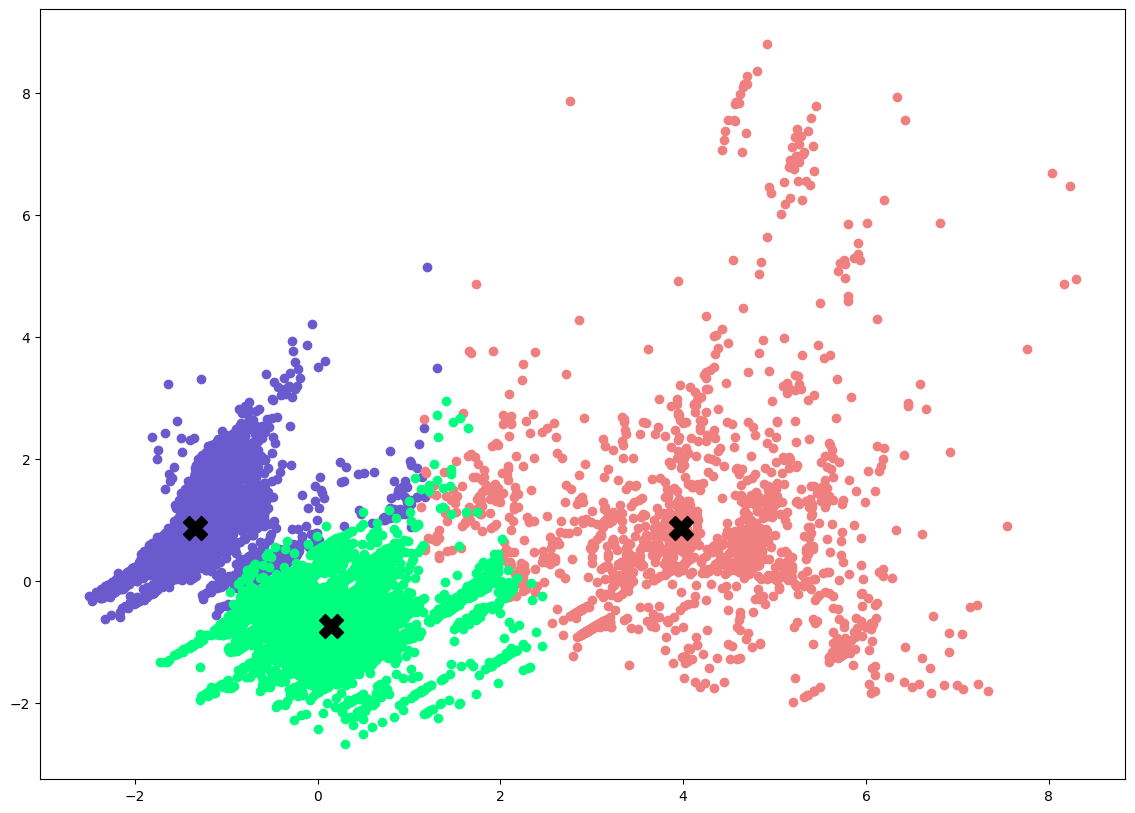

In [24]:
plt.figure(figsize=(14,10))

#plt.scatter(reduced_X.PC1, reduced_X.PC2)

plt.scatter(reduced_X[reduced_X.cluster == 1].loc[:, 'PC1'], reduced_X[reduced_X.cluster == 1].loc[:, 'PC2'], color='slateblue')
plt.scatter(reduced_X[reduced_X.cluster == 0].loc[:, 'PC1'], reduced_X[reduced_X.cluster == 0].loc[:, 'PC2'], color='lightcoral')
plt.scatter(reduced_X[reduced_X.cluster == 2].loc[:, 'PC1'], reduced_X[reduced_X.cluster == 2].loc[:, 'PC2'], color='springgreen')
#plt.scatter(reduced_X[reduced_X.cluster == 3].loc[:, 'PC1'], reduced_X[reduced_X.cluster == 3].loc[:, 'PC2'], color='indigo')
#plt.scatter(reduced_X[reduced_X.cluster == 4].loc[:, 'PC1'], reduced_X[reduced_X.cluster == 4].loc[:, 'PC2'], color='teal')
#plt.scatter(reduced_X[reduced_X.cluster == 5].loc[:, 'PC1'], reduced_X[reduced_X.cluster == 5].loc[:, 'PC2'], color='red')


plt.scatter(reduced_centers[:,0], reduced_centers[:,1], color='black', marker='X', s=300)

plt.show()

In [23]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

c:\Users\Auli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[ 3.98097513,  0.86062202],
       [-1.33777859,  0.86454427],
       [ 0.14753607, -0.73834344]])

In [25]:
kmeans.inertia_

60725.03755533194

In [32]:
k_rng = range(1,5)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

In [33]:
sse

[107184.00000000004, 77880.23864122585, 60725.0434931534, 50223.64249223631]

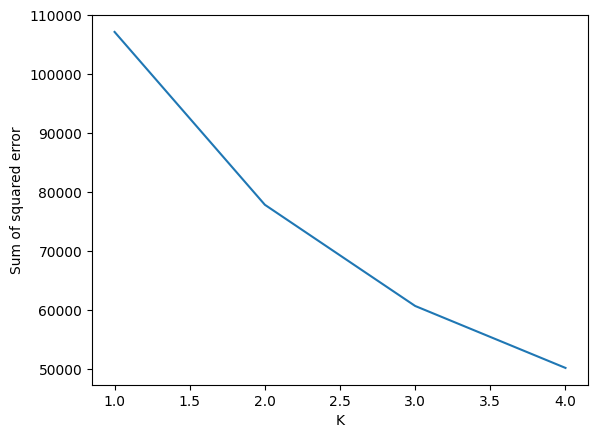

In [34]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

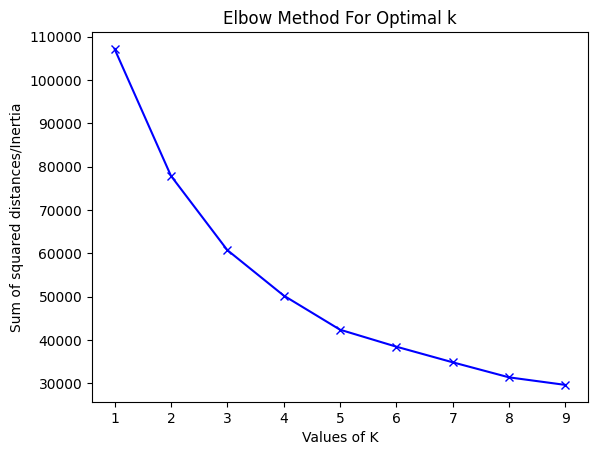

In [35]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

Saving model to see it perform with real time data

In [362]:
import joblib

joblib.dump(kmeans, 'KMeans_ertq')

['KMeans_ertq']

In [88]:
df['cluster'] = reduced_X.cluster

In [89]:
df

,mag,magType,tsunami,latitude,longitude,depth,month,location,cluster
0,2.30,4,0,61.089900,-152.313200,108.700000,10,1,0.0
1,0.30,4,0,39.345100,-119.960300,4.900000,10,16,0.0
2,1.90,4,0,53.485200,-165.266800,40.500000,10,1,0.0
3,4.20,0,0,5.461800,126.631000,67.437000,10,77,4.0
4,2.01,2,0,19.188667,-155.397995,32.049999,10,36,5.0
...,...,...,...,...,...,...,...,...,...
15737,2.50,2,0,17.948000,-66.914167,13.030000,9,78,NaN
15738,1.50,4,0,59.957700,-147.363000,19.700000,9,1,NaN
15739,1.60,4,0,37.094000,-115.766600,8.700000,9,62,NaN
15740,0.91,2,0,38.840500,-122.808000,2.390000,9,113,NaN


In [101]:
print(f'0.0 cluster - Max mag: {df[df.cluster == 0.0].mag.max()}, min mag: {df[df.cluster == 0.0].mag.min()}')
print(f'1.0 cluster - Max mag: {df[df.cluster == 1.0].mag.max()}, min mag: {df[df.cluster == 1.0].mag.min()}')
print(f'2.0 cluster - Max mag: {df[df.cluster == 2.0].mag.max()}, min mag: {df[df.cluster == 2.0].mag.min()}')
#print(f'3.0 cluster - Max mag: {df[df.cluster == 3.0].mag.max()}, min mag: {df[df.cluster == 3.0].mag.min()}')
#print(f'4.0 cluster - Max mag: {df[df.cluster == 4.0].mag.max()}, min mag: {df[df.cluster == 4.0].mag.min()}')
#print(f'5.0 cluster - Max mag: {df[df.cluster == 5.0].mag.max()}, min mag: {df[df.cluster == 5.0].mag.min()}')

0.0 cluster - Max mag: 6.3, min mag: -1.04
1.0 cluster - Max mag: 6.7, min mag: -1.29
2.0 cluster - Max mag: 5.9, min mag: -0.41


# Checking number of clusters

In [1]:
from sklearn.metrics import silhouette_score

In [26]:
silhouette_score(X, kmeans.labels_)

0.332506330592804

Creting list to see scores with different cluster number

In [27]:
k_means_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1,7)]

silhouette_scores = [silhouette_score(X, model.labels_) for model in k_means_per_k[1:]]

silhouette_scores

[0.5303044601604174,
 0.33251563985291427,
 0.3872311403879378,
 0.39697571312897034,
 0.37053256670785645]

Plotting silhouette scores

In [28]:
from pylab import rcParams

C:\Users\Auli\AppData\Local\Temp\ipykernel_8532\158933474.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,7), silhouette_scores, 'bo-', color='blue',


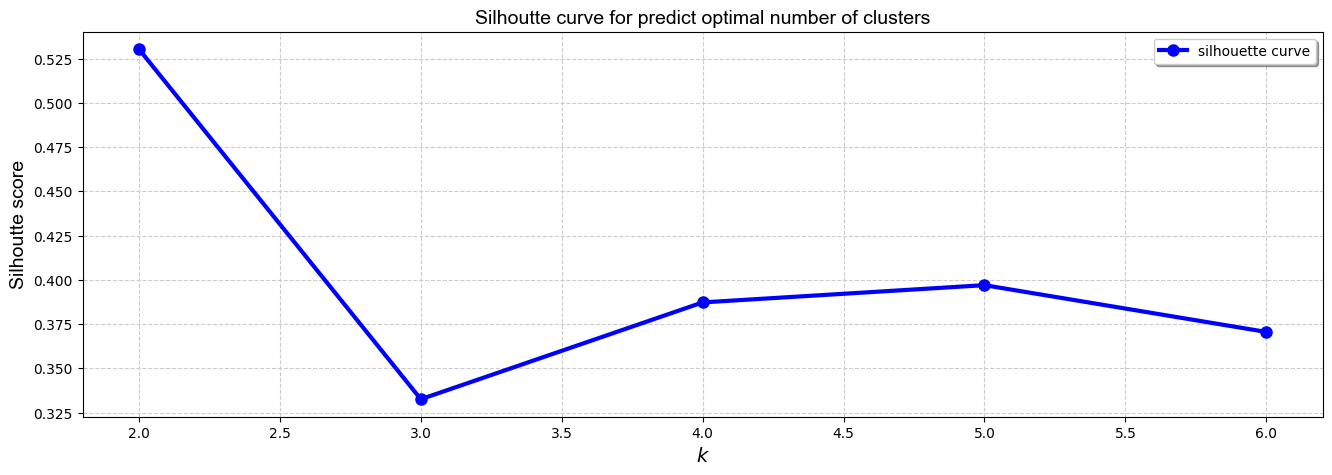

In [31]:
rcParams['figure.figsize'] = 16,5
plt.plot(range(2,7), silhouette_scores, 'bo-', color='blue',
linewidth=3, markersize=8, label='silhouette curve')
plt.xlabel('$k$', fontsize=14, family='Arial')
plt.ylabel('Silhoutte score', fontsize=14, family='Arial')
plt.grid(which='major', color='#cccccc', linestyle='--')

plt.title('Silhoutte curve for predict optimal number of clusters', family='Arial', fontsize=14)

k = np.argmax(silhouette_scores) * 2

plt.legend(shadow=True)

plt.show()

# Visualizing earthquake locations

In [44]:
import folium
from folium.plugins import HeatMap

In [46]:
map_data = df[['latitude', 'longitude', 'mag']]

In [47]:
map_data.isna().sum()*100/len(map_data)

latitude     0.000000
longitude    0.000000
mag          0.006352
dtype: float64

In [48]:
no_mag = map_data[map_data.mag.isna()].index
map_data.drop(no_mag, inplace=True)

C:\Users\Auli\AppData\Local\Temp\ipykernel_19312\3940216063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data.drop(no_mag, inplace=True)


In [50]:
hm = folium.Map(location=[37.0902, -95.7129], #Center of USA
               tiles='stamentoner',
               zoom_start=3.4)
HeatMap(map_data, 
        min_opacity=0.4,
        blur = 18
               ).add_to(folium.FeatureGroup(name='Heat Map').add_to(hm))
folium.LayerControl().add_to(hm)
hm